<a href="https://colab.research.google.com/github/gastan81/homework-0/blob/master/9_bonus_pandas_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PandasAI

The process of setting up an Assistant and managing Threads to work directly within the OpenAI ecosystem was quite arduous.

PandasAI is a library that allows us to query our dataframes directly, leaving more time and energy to focus on analysis rather than managing the technology.

> **A note before getting started**: Due to the nature of how Large Language Models respond, the outputs of most queries will be different each time they are run. Therefore, the exact results of this notebook are unlikely to be recreated during subsequent executions.     
Also, Pandas AI is also a rather young library, so it may evolve rapidly.

## Installation
To get started, we need to install the latest version of PandasAI.

In [ ]:
# in Colab, run this line at the start of every session
# working locally, installation only needs to happen once
!pip install pandasai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.5/134.5 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.5/257.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.6 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imageio 2.31.6 requires pillow<10.1.0,>=8.3.2, but you have pillow 10.2.0 which is incompatible.


As indicated above, the session requires a restart to proceed. There may also be instabilities due to unresolved dependencies. Such  is the risk working with the latest technologies.

# SmartDataframe

To use PandasAI, we will first have to transform our dataframes into a new type of object: one which allows us to leverage the power of generative AI models to help us in our tasks.

We'll start by importing the libraries that we need.

In [ ]:
import pandas as pd
from pandasai import SmartDataframe
from pandasai.llm import OpenAI

## Loading the data

Next we'll choose the dataframe we wish to work with. For starters, let's load *products*.

In [ ]:
# products_cl.csv
url = 'https://drive.google.com/file/d/1IPnKYLSnrST0HBZMeSeNrhFfWU31QvwB/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products_cl = pd.read_csv(path)

## Selecting the AI

To use PandasAI, we will need to select a large language model. In this notebook, we'll be using GPT-3.5-Turbo from [OpenAI](https://platform.openai.com/overview). You'll have to choose your own model based on performance and pricing.

More information on callable LLMs can be found [here](https://docs.pandas-ai.com/en/latest/API/llms/).

> **Note:** To use an LLM from OpenAI, **signup** and **payment** are *required*. See the previous notebook.

In [ ]:
from google.colab import userdata
API_key = userdata.get('ChatGPT')

In [ ]:
llm = OpenAI(api_token=API_key,
             model_name = 'gpt-3.5-turbo')

In [ ]:
llm = OpenAI(api_token='YOUR API KEY HERE',
             model_name = 'gpt-3.5-turbo')

And now that we have selected our model, we have all the pieces necessary to create a SmartDataframe. With a SmartDataframe, we can still use most of the techniques and methods we already know from Pandas, but we can also ask questions and give instructions.

In [ ]:
products_sdf = SmartDataframe(products_cl, config={"llm": llm})

## Querying the dataframe

The `.chat()` method allows us to "speak" to our dataframe, aiding us in performing tasks and gathering analysis.

In [ ]:
products_sdf.chat("Taking the first three characters in the column sku as a brand code, identify the 5 most popular brands being carried")

'The 5 most popular brands are: APP, PAC, OWC, AP2, BEL'

We can write our own code to check the AI's work.
> **Note:** It is *highly* recommended, especially when starting out, to check the AI's work. Different phrasings of the same task can result in either valuable or worthless answers, and only experiment will help to write good prompts.

In [ ]:
products_sdf.sku.str[:3].value_counts()

APP    1721
PAC    1396
OWC     354
AP2     349
BEL     219
       ... 
ADA       1
EXT       1
BAS       1
par       1
QAR       1
Name: sku, Length: 243, dtype: int64

In [ ]:
products_sdf.chat("What are the mean and median prices of products?")

'The mean price is 667.3462680144115 and the median price is 112.99000000000001.'

## Plotting

We can also use our AI assistant to create plots for us.

In [ ]:
import seaborn as sns

# orders_qu.csv
url = "https://drive.google.com/file/d/143CzG5DriVSPMkaL1UP4k3Y80oS8fgbV/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_qu = pd.read_csv(path)

orders_sdf = SmartDataframe(orders_qu, config={"llm": llm})

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/pipelines/smart_datalake_chat/code_execution.py", line 46, in execute
    result = pipeline_context.query_exec_tracker.execute_func(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 134, in execute_func
    step_data = self._generate_exec_step(tag, result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 183, in _generate_exec_step
    self._response = self._format_response(result)
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/query_exec_tracker.py", line 202, in _format_response
    with open(result["value"], "rb") as image_file:
FileNotFoundError: [Errno 2] No such file or directory: '/content/exports/charts/temp_chart.png'
. Retrying


'/content/exports/charts/temp_chart.png'

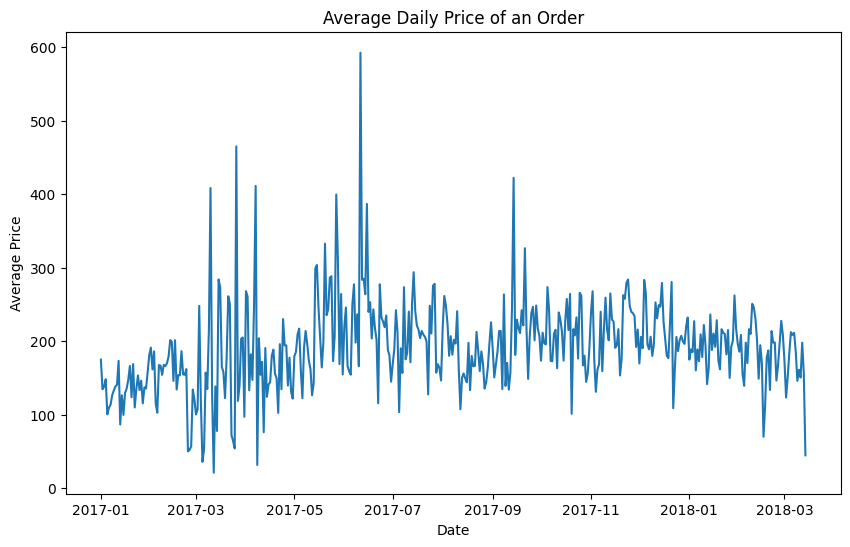

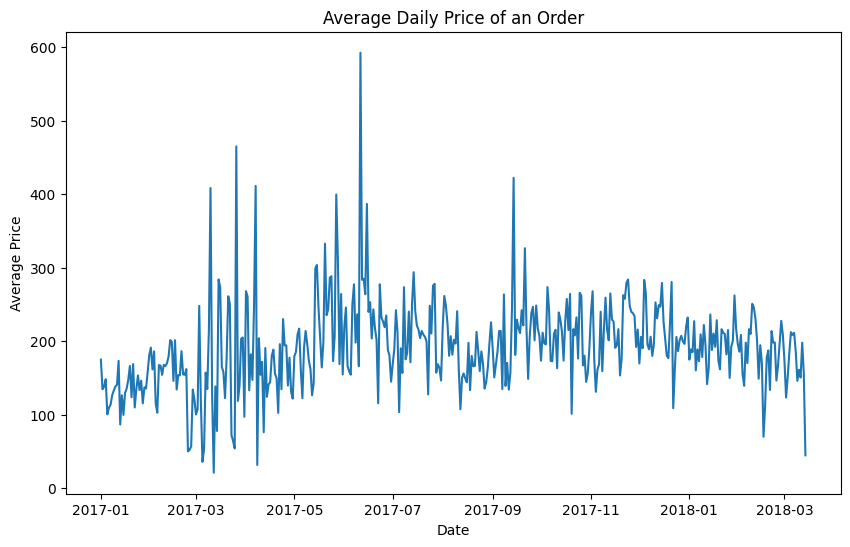

In [ ]:
orders_sdf.chat("Using the Seaborn library, display the average daily price of an order on a line plot")

Reviewing the last code executed allows us to see how the chart was generated. We can even see that the chart has been saved as a `.png` file for later use!

In [ ]:
print(orders_sdf.last_code_executed)

df = dfs[0]
df['created_date'] = pd.to_datetime(df['created_date'])
df['date'] = df['created_date'].dt.date
df_avg_price = df.groupby('date')['total_paid'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='total_paid', data=df_avg_price)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Daily Price of an Order')
plt.savefig('/content/exports/charts/temp_chart.png')
result = {'type': 'plot', 'value': '/content/exports/charts/temp_chart.png'}
result


# Larger tasks

Let's try asking our SmartDataframe to take on a more detailed and creative task, like category creation.

In [ ]:
products_sdf.chat("""Use the name and desc columns to assign categories to the products.
Results should be stored in a new column called category.""")


,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Other
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Keyboard
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Mouse
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Other
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Other
...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,Other
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Other
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Other
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Other


We can inspect the `.last_code_generated` attribute to see what code has been created.

In [ ]:
print(products_sdf.last_code_generated)

def assign_category(row):
    if 'keyboard' in row['name'].lower() or 'keyboard' in row['desc'].lower():
        return 'Keyboard'
    elif 'mouse' in row['name'].lower() or 'mouse' in row['desc'].lower():
        return 'Mouse'
    elif 'monitor' in row['name'].lower() or 'monitor' in row['desc'].lower():
        return 'Monitor'
    elif 'printer' in row['name'].lower() or 'printer' in row['desc'].lower():
        return 'Printer'
    else:
        return 'Other'


dfs[0]['category'] = dfs[0].apply(assign_category, axis=1)
result = {'type': 'dataframe', 'value': dfs[0]}


> **Note:** While SmartDataframes do inherit many methods from Pandas DataFrames, they do not inherit all. There can be problems with column assigment of the sort            
&emsp;&ensp;`sdf['new_column'] = assigned_values`       
Problems have also been experienced with the `.assign()` method. If the produced code does not work well with the `SmartDataframe`, try different methods like `.apply()` or `.pipe()`, or apply the function to the orginal Pandas `DataFrame` as below.

In [ ]:
def assign_category(row):
    if 'keyboard' in row['name'].lower() or 'keyboard' in row['desc'].lower():
        return 'Keyboard'
    elif 'mouse' in row['name'].lower() or 'mouse' in row['desc'].lower():
        return 'Mouse'
    elif 'monitor' in row['name'].lower() or 'monitor' in row['desc'].lower():
        return 'Monitor'
    elif 'printer' in row['name'].lower() or 'printer' in row['desc'].lower():
        return 'Printer'
    else:
        return 'Other'

# note we needed to change the line below, as the generated code would have applied to
# a non-existent object dfs
products_cl['category'] = products_cl.apply(assign_category, axis=1)

In [ ]:
products_cl

,sku,name,desc,price,in_stock,type,category
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,1,8696,Other
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59.00,0,13855401,Keyboard
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59.00,0,1387,Mouse
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25.00,0,1230,Other
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,1,1364,Other
...,...,...,...,...,...,...,...
9987,BEL0376,Belkin Travel Support Apple Watch Black,compact and portable stand vertically or horiz...,29.99,1,12282,Other
9988,THU0060,"Enroute Thule 14L Backpack MacBook 13 ""Black",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Other
9989,THU0061,"Enroute Thule 14L Backpack MacBook 13 ""Blue",Backpack with capacity of 14 liter compartment...,69.95,1,1392,Other
9990,THU0062,"Enroute Thule 14L Backpack MacBook 13 ""Red",Backpack with capacity of 14 liter compartment...,69.95,0,1392,Other


In [ ]:
products_cl['category'].value_counts()

Other       9519
Monitor      326
Keyboard      98
Mouse         38
Printer       11
Name: category, dtype: int64

It seems that, contrary to our instuctions, a lot of things have landed in the 'Other' category! We also have *no category* for computers or laptops...

## Refining our code

While generative AI models are quite good at producing simple blocks of code that we might lose a few minutes remembering how to write and debug, they still need supervision with complex tasks.

We now have two options:
1. Manually adjust the `assign_category` function to include more categories and keywords
2. Ask for a new code, this time specifying which categories products should be assigned to

Either option will be an iterative process, requiring us still to review what has been produced and see that it matches our expectations and requirements.

To help guide our decision, we can first review a sample of what products were categorized as "Other".

In [ ]:
products_cl.loc[products_cl.category == "Other"].sample(50)

,sku,name,desc,price,in_stock,type,category
4008,BEL0246,Belkin InvisiGlass TrueClear invisible glass P...,"Invisible protective glass iPhone 5 5s 5c, SE",19.99,1,13555403,Other
429,APP0531,Apple AirPort Time Capsule 3TB,Base Airport 802.11ac Wi-Fi and 3TB hard drive.,429.00,0,11935397,Other
7347,APP2266,"Apple MacBook Pro 13 ""Core i5 3.1GHz Touch Bar...",New MacBook Pro 13-inch Core i5 Touch Bar 31 G...,2489.00,0,"1,02E+12",Other
9376,HTE0019,HyperJuice 80W Battery 4 USB ports and 1-A USB-C,Charging Adapter 80W HyperJuice 4 USB-A ports ...,79.95,1,12585395,Other
332,MUV0059,Muvit cable connector black Lightning to USB,Lightning to USB Cable for iPhone 5 iPad mini ...,17.99,0,1230,Other
1141,APP1935,Apple Mac mini Core i5 28GHz | 8GB RAM | Fusio...,Apple desktop Mac mini Core i5 28GHz | 8GB RAM...,1219.00,0,1282,Other
1143,APP1937,Apple Mac mini Core i5 28GHz | 8GB RAM | 512GB...,Apple desktop Mac mini Core i5 28GHz | 8GB RAM...,1339.00,0,1282,Other
6179,SPE0171-A,"Open - Speck SeeThru Case Macbook Air 13 ""Blue...",Protective housing MacBook Air 13 inches,49.90,0,1298,Other
3042,TUC0242,Tucano Tosto Case + Protector iPhone 6 / 6S Pl...,Cover for iPhone 6 / 6S Plus.,29.90,0,11865403,Other
5924,PAC1743,QNAP TS-131p | 6TB (1x6TB) Seagate IronWolf,NAS 6TB capacity Seagate IronWolf for Mac and PC,446.98,0,12175397,Other


We'll try the route of providing categories and allowing the AI to choose how products are selected to fill those categories.

In [ ]:
products_sdf.chat("""Given the following categories, write a script to categorize these products using information
in the name and desc columns.
Available categories are: Computers and Laptops, Computer Accessories, Printers and Scanners, Audio Accessories, Cameras,
Phones and Tablets, Storage Solutions, Servers, Cables and Connectors, Phone Accessories, Other
The code should assign each item to a single category and minimize the use of the Other category. Resulting category assignments
should be saved to a new column named category.
""")
# again, we will look at the code our AI generates
print(products_sdf.last_code_generated)

categories = {'Computers and Laptops': ['computer', 'laptop'], 'Computer Accessories': ['keyboard', 'mouse'], 'Printers and Scanners': ['printer', 'scanner'], 'Audio Accessories': ['headphones', 'speakers'], 'Cameras': ['camera'], 'Phones and Tablets': ['phone', 'tablet'], 'Storage Solutions': ['hard drive', 'usb'], 'Servers': ['server'], 'Cables and Connectors': ['cable', 'connector'], 'Phone Accessories': ['phone accessory']}


def categorize_product(row):
    name = row['name'].lower()
    desc = row['desc'].lower()
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in name or keyword in desc:
                return category
    return 'Other'


for df in dfs:
    df['category'] = df.apply(categorize_product, axis=1)
result = {'type': 'dataframe', 'value': dfs[0]}


It seems we will once more need to make some changes, like moving the `categories` dictionary inside the function to limit its scope and applying the function to a single dataframe, rather than a list of them.

In [ ]:
def categorize_product(row):
    name = row['name'].lower()
    desc = row['desc'].lower()
    categories = {'Computers and Laptops': ['computer', 'laptop'],
                  'Computer Accessories': ['keyboard', 'mouse'],
                  'Printers and Scanners': ['printer', 'scanner'],
                  'Audio Accessories': ['headphones', 'speakers'],
                  'Cameras': ['camera'],
                  'Phones and Tablets': ['phone', 'tablet'],
                  'Storage Solutions': ['hard drive', 'usb'],
                  'Servers': ['server'],
                  'Cables and Connectors': ['cable', 'connector'],
                  'Phone Accessories': ['phone accessory']
                  }

    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in name or keyword in desc:
                return category
    return 'Other'

products_cl['category'] = products_cl.apply(categorize_product, axis=1)

Again, we will review the "Other" category to see if we spot any pattern in the items being assigned there.

In [ ]:
products_cl.loc[products_cl.category == "Other"].sample(50)

,sku,name,desc,price,in_stock,type,category
2335,APP1098,Apple iPod Nano 16Gb Gold,Music player iPod Nano 16GB the 8th generation...,179.00,0,11821715,Other
7937,OWC0200,Mac OWC Memory 8GB 1866MHz DIMM,Mac Pro 8GB RAM 2013.,118.99,1,1364,Other
3052,THU0022,Thule Crossover Backpack 32L Black Macbook and...,resistant and waterproof 32 L Backpack for Mac...,129.95,0,1392,Other
1196,BEA0021,Beats by Dr. Dre Dude ± eco MUI support for Bl...,Beats Pill support with articulated arms and h...,49.95,0,5398,Other
8701,APP2623,"Apple iPad Smart Cover Case Pro 105 ""Blue",Official Apple iPad Case Pro 105 inch folding ...,59.00,1,12635403,Other
609,MAK0024,Maclocks Security Security Support Apple TV Mount,Aluminum safety support VESA for Apple TV.,64.99,0,12355400,Other
7439,APP2121,"Apple iPad Pro 12.9 ""Wi-Fi + Cellular 256GB Si...",New iPad Pro 12.9 inch 256GB,1229.00,0,51861714,Other
1990,SPH0003-A,Open - Nubby Sphero robotic ball Sphero Case Blue,Protective Case for Sphero 2.0,15.99,0,1298,Other
4274,IFX0051,"Battery iFixit MacBook Air 11 ""Late 2010",Battery replacement Macbook 11 inches end 2010,96.99,1,13005399,Other
8224,ALL0021,Allocacoc PowerCube extended plug strip White ...,Outlet power strip extension 15m cube-shaped 5...,14.95,1,5395,Other


At this point it may be best to add new keywords to the `categories` dictionary above until our job is done.

## SmartDatalake

Of course, in this project and many others, we are often interested in the interations of many related collections of data. So far, we have used `.merge()` to bring together dataframes as we need them.

With PandasAI, we can instead create a SmartDatalake from multiple dataframes, and then allow the underlying LLM to infer connections.

In [ ]:
from pandasai import SmartDatalake

We can start by joining loading the rest of our Eniac data and joining everything into one SmartDatalake.

In [ ]:
# orderlines_qu.csv
url = "https://drive.google.com/file/d/1yWO-mQfxQtnSZdCgdNlIEUrZSCW1HN5O/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_qu = pd.read_csv(path)

# brands.csv
url = "https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
brands = pd.read_csv(path)

In [ ]:
eniac = SmartDatalake(
    [orders_qu,
     orderlines_qu.drop("product_id", axis=1),  # a little experimenting has shown this column causing problems, so we drop it immediately
     products_cl,
     brands],
    config={"llm": llm}
)

In [ ]:
eniac.chat("Name the three products which were ordered the most often.")

'The three products ordered the most often are: IPhone AppleCare Protection Plan, Apple Lightning Cable Connector to USB 1m White (OEM), AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch.'

In [ ]:
print(eniac.last_code_generated)

# TODO: import the required dependencies
import pandas as pd

# Write code here
orders_df = dfs[0]
order_items_df = dfs[1]
products_df = dfs[2]

# Merge order_items_df and products_df on sku
merged_df = pd.merge(order_items_df, products_df, on='sku')

# Group by product name and calculate the sum of product quantity
product_quantity_sum = merged_df.groupby('name')['product_quantity'].sum()

# Sort the product quantity in descending order and get the top 3 products
top_3_products = product_quantity_sum.sort_values(ascending=False).head(3)

# Get the names of the top 3 products
top_3_product_names = top_3_products.index.tolist()

# Declare result var
result = {
    "type": "string",
    "value": f"The three products ordered the most often are: {', '.join(top_3_product_names)}."
}


'/content/exports/charts/temp_chart.png'

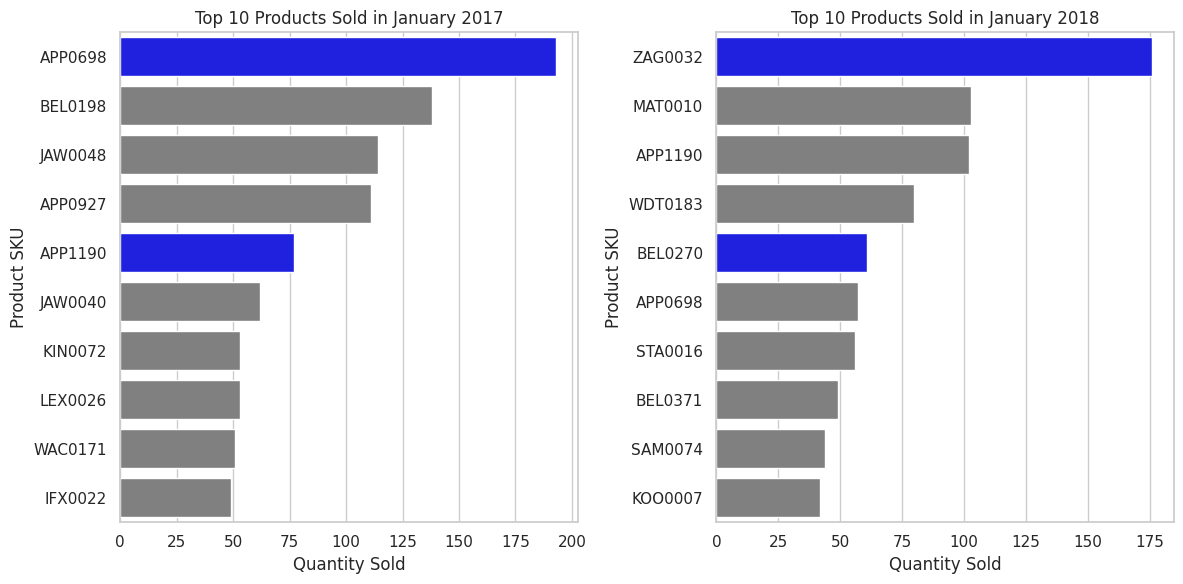

In [ ]:
eniac.chat("""Using Seaborn, make two horizontal bar plots for the top 10 products sold in January 2017
& the top 10 products sold in January 2018.
Each chart should be ordered by the number of products sold, and each should contain only 10 items.
Products that appear in both charts should be colored blue.
All other products should be colored gray.""")

This has of course required a few different attempts to pose the query *correct enough* to get a result approaching what is needed.

Still, it looks like this will take some editing...

In [ ]:
print(eniac.last_code_executed)

orders_df = dfs[0]
order_items_df = dfs[1]
jan_2017_orders = orders_df[(orders_df['created_date'] >= '2017-01-01') & (orders_df['created_date'] <= '2017-01-31')]
jan_2018_orders = orders_df[(orders_df['created_date'] >= '2018-01-01') & (orders_df['created_date'] <= '2018-01-31')]
jan_2017_order_items = jan_2017_orders.merge(order_items_df, left_on='order_id', right_on='id_order')
jan_2018_order_items = jan_2018_orders.merge(order_items_df, left_on='order_id', right_on='id_order')
jan_2017_product_sales = jan_2017_order_items.groupby('sku')['product_quantity'].sum().reset_index()
jan_2018_product_sales = jan_2018_order_items.groupby('sku')['product_quantity'].sum().reset_index()
top_10_jan_2017_products = jan_2017_product_sales.sort_values(by='product_quantity', ascending=False).head(10)
top_10_jan_2018_products = jan_2018_product_sales.sort_values(by='product_quantity', ascending=False).head(10)
colors = [('blue' if sku in top_10_jan_2018_products['sku'].values else 'gray') for sku in 

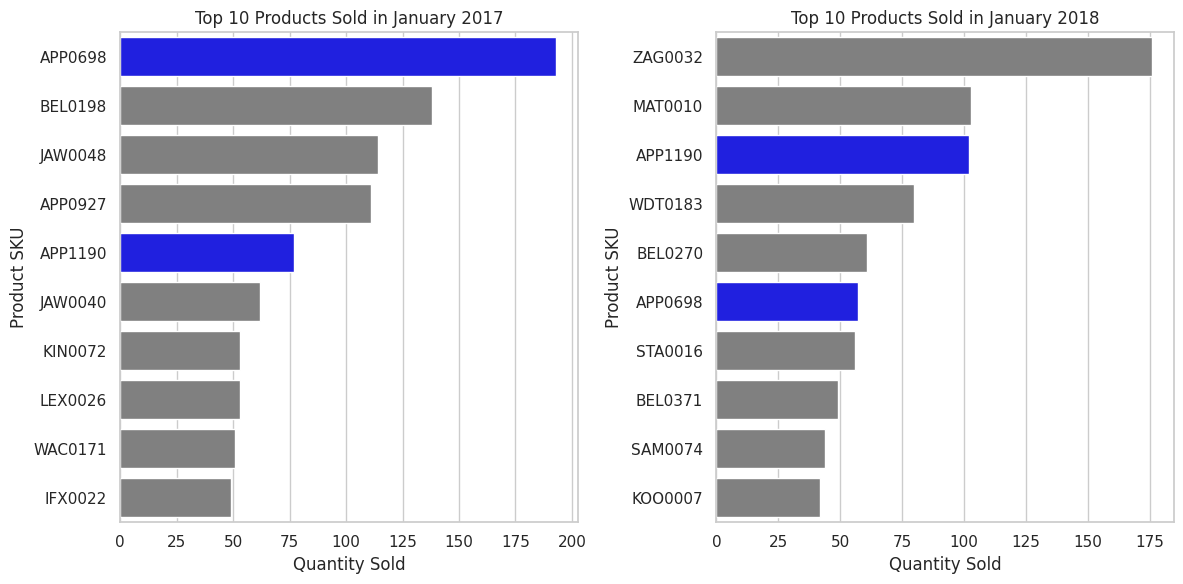

In [ ]:
orders_df = orders_qu.copy()
order_items_df = orderlines_qu.copy()
import matplotlib.pyplot as plt
jan_2017_orders = orders_df[(orders_df['created_date'] >= '2017-01-01') & (orders_df['created_date'] <= '2017-01-31')]
jan_2018_orders = orders_df[(orders_df['created_date'] >= '2018-01-01') & (orders_df['created_date'] <= '2018-01-31')]
jan_2017_order_items = jan_2017_orders.merge(order_items_df, left_on='order_id', right_on='id_order')
jan_2018_order_items = jan_2018_orders.merge(order_items_df, left_on='order_id', right_on='id_order')
jan_2017_product_sales = jan_2017_order_items.groupby('sku')['product_quantity'].sum().reset_index()
jan_2018_product_sales = jan_2018_order_items.groupby('sku')['product_quantity'].sum().reset_index()
top_10_jan_2017_products = jan_2017_product_sales.sort_values(by='product_quantity', ascending=False).head(10)
top_10_jan_2018_products = jan_2018_product_sales.sort_values(by='product_quantity', ascending=False).head(10)
# the problem lies in setting one list of colors for both charts
colors1 = [('blue' if sku in top_10_jan_2018_products['sku'].values else 'gray') for sku in top_10_jan_2017_products['sku'].values]
colors2 = [('blue' if sku in top_10_jan_2017_products['sku'].values else 'gray') for sku in top_10_jan_2018_products['sku'].values]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# palette now needs to be adjusted for each chart
sns.barplot(x='product_quantity', y='sku', data=top_10_jan_2017_products, palette=colors1, ax=ax1)
ax1.set_title('Top 10 Products Sold in January 2017')
ax1.set_xlabel('Quantity Sold')
ax1.set_ylabel('Product SKU')
sns.barplot(x='product_quantity', y='sku', data=top_10_jan_2018_products, palette=colors2, ax=ax2)
ax2.set_title('Top 10 Products Sold in January 2018')
ax2.set_xlabel('Quantity Sold')
ax2.set_ylabel('Product SKU')
plt.tight_layout()
plt.savefig('/content/exports/charts/temp_chart.png')

# Challenges

The challenge here will be rather open-ended. Remember, there are many different LLMs to work with, and each one can produce different results -- even when faced with the same query.

The task, then, is to experiment with which LLM and which tasks your own workflow can be improved. It may be in finding inspiration on which aspects of your data to investigate. It may be letting the AI create graphs for you based on your needs, or manage the merging of your dataframes.

Just as each inter-collegue relationship is different, each data scientist will find their own way to best work with AI tools.

Good luck! 😀